In [311]:
#Importing libraries
import warnings 
warnings.filterwarnings('ignore')

#For data pre-processing and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats


#Model Algorithms
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm  #OLS

In [312]:
od = pd.read_csv("A:\Additional\details.csv")

In [313]:
od

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [314]:
od.shape

(8128, 13)

In [315]:
od.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [316]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [317]:
od.duplicated().sum()

1202

#### Inference:
1.Data Contain Duplicate Values.<br>
2.Data Contain Null Values.<br>
3.We have 9 obj cols and 4 int cols.<br>
4.Target Variable is selling_price.<br>
5.Data Contain incorrect values in mileage,engine,max_power,torque.

1.Duplicate Values

In [318]:
cd = od.copy()

In [319]:
cd.drop_duplicates(inplace = True)

In [320]:
cd.duplicated().sum()

0

In [321]:
cd.shape

(6926, 13)

2.Null Values

In [322]:
td = cd.dropna(how = 'any')
td.shape

(6717, 13)

In [323]:
(6926 - 6717)/6926*100

3.017614784868611

5.Cleaning Data

In [324]:
import re

In [325]:
td2 = td.copy()

In [326]:
list = td2['torque'].to_list()
torque_ = []
def rpm(x):
    for i in x:
        res = i.replace(".", "")
        res = res.replace(",", "")
        temp = [int(s) for s in re.findall(r'\d+', res)]
        torque_.append(max(temp))

rpm(list)
print(list[:2])
print(torque_[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [327]:
td2['RPM'] = torque_
td2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,RPM
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,3500
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,2750
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2750


In [328]:
list2 = td2['mileage'].to_list()
mileage = []
def mil(x):
      for m in x:
        temp = []
        try:
              for s in m.split(" "):
                    temp.append(float(s))
        except:
              pass
        mileage.append(max(temp))

mil(list2)
print(list2[:2])
print(mileage[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [329]:
td2['mileage(kmpl)'] = mileage

td2.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,RPM,mileage(kmpl)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [330]:
list3 = td2['engine'].to_list()
cc = []
def engine(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
              pass
        cc.append(max(temp))

engine(list3)
print(list3[:2])
print(cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [331]:
td2['engine_capacity'] = cc

td2.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,RPM,mileage(kmpl),engine_capacity
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [423]:
list4 = td2['max_power'].to_list()
max_power = []
def Power(x):
      for item in x:
        temp = []
        try:
              for s in item.split(" "):
                temp.append(float(s))
        except:
              pass
        max_power.append(max(temp))

Power(list4)
print(list4[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [333]:
td2['max_power_new'] = max_power
td2.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,RPM,mileage(kmpl),engine_capacity,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [334]:
od_new = td2.drop(['mileage', 'engine', 'max_power', 'torque','name'], axis = 1)

In [335]:
od_new

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,RPM,mileage(kmpl),engine_capacity,max_power_new
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,5.0,3500,18.90,998.0,67.10
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,5.0,2750,22.54,1396.0,88.73
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,4000,18.50,1197.0,82.85
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,2750,16.80,1493.0,110.00


In [425]:
od_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             6717 non-null   int64  
 1   selling_price    6717 non-null   int64  
 2   km_driven        6717 non-null   int64  
 3   fuel             6717 non-null   object 
 4   seller_type      6717 non-null   object 
 5   transmission     6717 non-null   object 
 6   owner            6717 non-null   object 
 7   seats            6717 non-null   float64
 8   RPM              6717 non-null   int64  
 9   mileage(kmpl)    6717 non-null   float64
 10  engine_capacity  6717 non-null   float64
 11  max_power_new    6717 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 940.2+ KB


In [337]:
cat_cols = od_new.select_dtypes(include = 'object').columns
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [338]:
num_cols = od_new.select_dtypes(exclude = 'object').columns
num_cols

Index(['year', 'selling_price', 'km_driven', 'seats', 'RPM', 'mileage(kmpl)',
       'engine_capacity', 'max_power_new'],
      dtype='object')

### Univariate Analysis

Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: fuel, dtype: int64 

Individual          6024
Dealer               666
Trustmark Dealer      27
Name: seller_type, dtype: int64 

Manual       6142
Automatic     575
Name: transmission, dtype: int64 

First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: owner, dtype: int64 

Frequency Distributuion of categories:


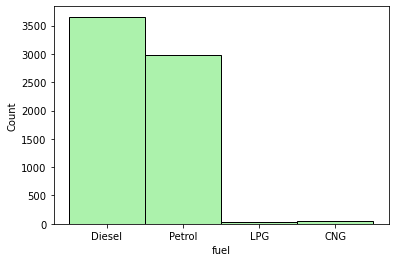

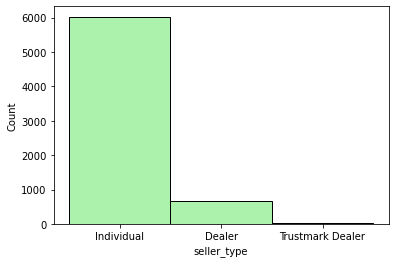

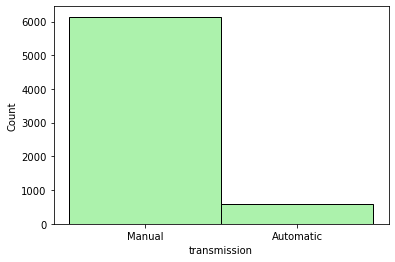

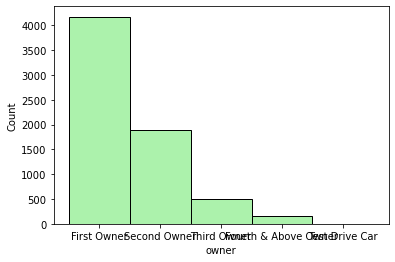

In [339]:
for i in cat_cols:
    print(od_new[i].value_counts(),"\n")
    
print("Frequency Distributuion of categories:")
for i in cat_cols:
    sns.histplot(x = od_new[i],color = "lightgreen")
    plt.show()

#### Inference:
1.Most Vehicles have diesel and petrol Fuel type.<br>
2.The Vehicles being sold through dealers are way lower than people selling there cars individually maybe people dont 
trust dealers when it comes to selling there vehicles.<br>
3.Vehicle being resold are mostly of manual transmission than automatic transmission.<br>
4.Count of vehicles are reducing as the no of owner it has is increasing.<br>
<b>Note:In Fuel Type we have LPG Fuels as well and everyone knows that cars dont run on LPG fuels so we will treat them in future</b>

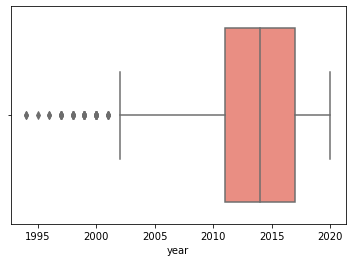

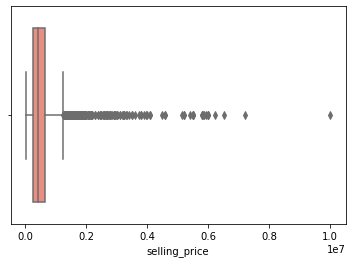

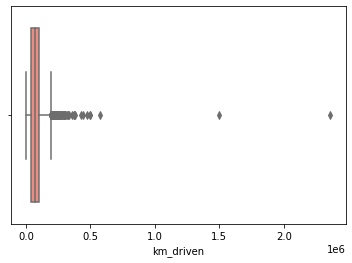

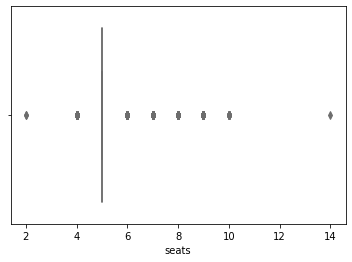

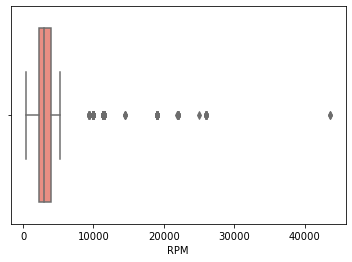

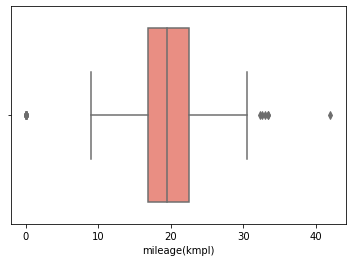

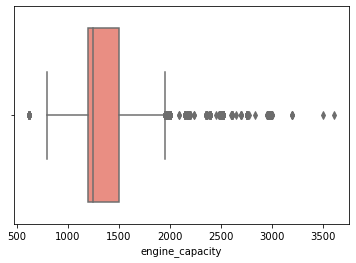

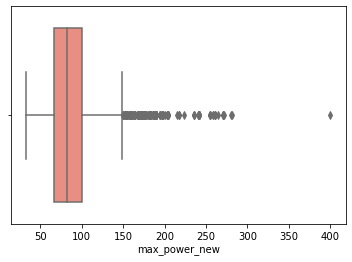

In [340]:
for n in num_cols:
    sns.boxplot(x=od_new[n], color = "salmon")
    plt.show()

#### Inference:
1.outlier Detection:
    a.Upper limit = selling_price,km_driven,seats,RPM,mileage(kmpl),engine_capacity,max_power_new.<br>
    b.lower limit = year,seats,RPM,mileage(kmpl),engine_capacity.<br>

<b>Note:Now there are columns that though are in numeric columns but there true nature is categorical columns such as seats,year so we won't be cliping them.</b>


In [341]:
od_new.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,95%,96%,97%,98%,99%,max
year,6717.0,2013.611136,3.897402,1994.0,2002.0000,2004.00,2005.00,2007.0,2008.00,2011.0,2013.0,2014.00,2017.0,2019.00,2019.00,2019.00,2.019000e+03,2019.00,2020.0
selling_price,6717.0,526385.997022,523550.448297,29999.0,55000.0000,70000.00,85000.00,110000.0,150000.00,250000.0,350000.0,420000.00,650000.0,1200000.00,1350000.00,1600000.00,1.880640e+06,2792000.00,10000000.0
km_driven,6717.0,73398.337651,58703.275270,1.0,5000.0000,6000.00,9500.00,11500.0,20000.00,38000.0,55000.0,68203.00,100000.0,155000.00,168000.00,181255.32,2.000000e+05,239912.16,2360457.0
seats,6717.0,5.434271,0.983805,2.0,4.0000,5.00,5.00,5.0,5.00,5.0,5.0,5.00,5.0,7.00,8.00,8.00,8.000000e+00,9.00,14.0
RPM,6717.0,3417.426679,2469.332351,400.0,1500.0000,1750.00,1750.00,1750.0,1900.00,2250.0,2750.0,3000.00,4000.0,4800.00,5000.00,9904.00,1.137500e+04,14415.00,43639.0
mileage(kmpl),6717.0,19.466585,4.048102,0.0,11.1832,11.79,12.05,12.8,13.93,16.8,18.6,19.44,22.5,25.83,26.21,26.59,2.739000e+01,28.40,42.0
engine_capacity,6717.0,1430.985857,493.469198,624.0,796.0000,796.00,796.00,796.0,993.00,1197.0,1199.0,1248.00,1498.0,2499.00,2523.00,2523.00,2.609000e+03,2956.00,3604.0
max_power_new,6717.0,87.766100,31.724555,32.8,37.0000,37.48,46.30,47.3,56.30,67.1,74.0,81.83,100.0,147.90,153.86,170.00,1.773128e+02,190.00,400.0


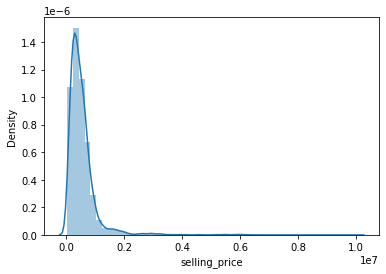

In [342]:
sns.distplot(od_new["selling_price"])
plt.show()

#### Inference:
Data is positively Skewed.

### Bivaraite Analysis

fuel  V/S Price


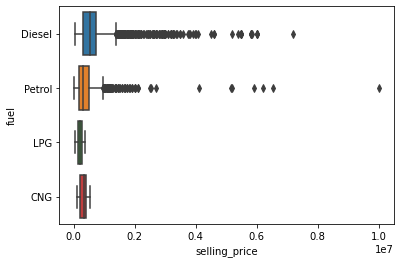

seller_type  V/S Price


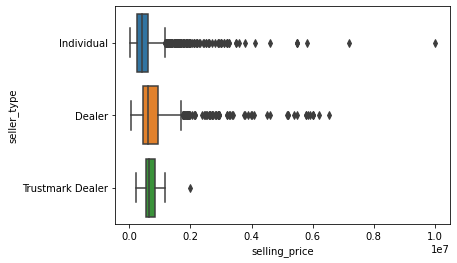

transmission  V/S Price


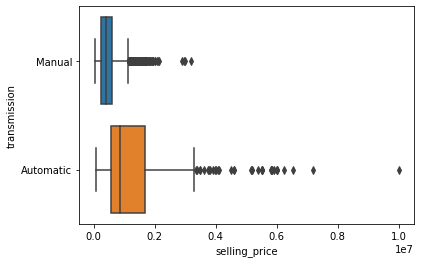

owner  V/S Price


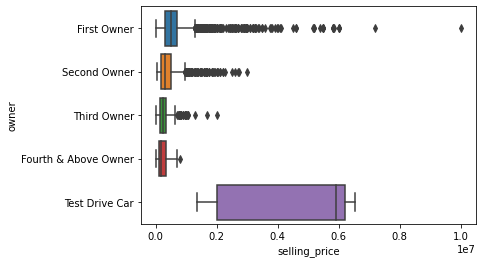

In [343]:
for i in cat_cols:
    print(i," V/S Price")
    sns.boxplot(x=od_new["selling_price"],y=od_new[i])    #barplot,violinplot
    plt.show()

#### Inference:
1.Diesel Cars has highest price range and are expensive to other fuel types as well followed by petrol.<br>
2.The cars dealers sell are more expensive then compared to individual sellers i guess now we know why people 
don't sell there cars through dealers ;).<br>
3.Automatic Vehicles are more expensive then the manual vehicles.<br>
4.Test drive cars are sold more expensive when it comes to owner type apart from this the price and its range is decreasing as 
the no of owners are increasing (They are in a negative relationship).<br>

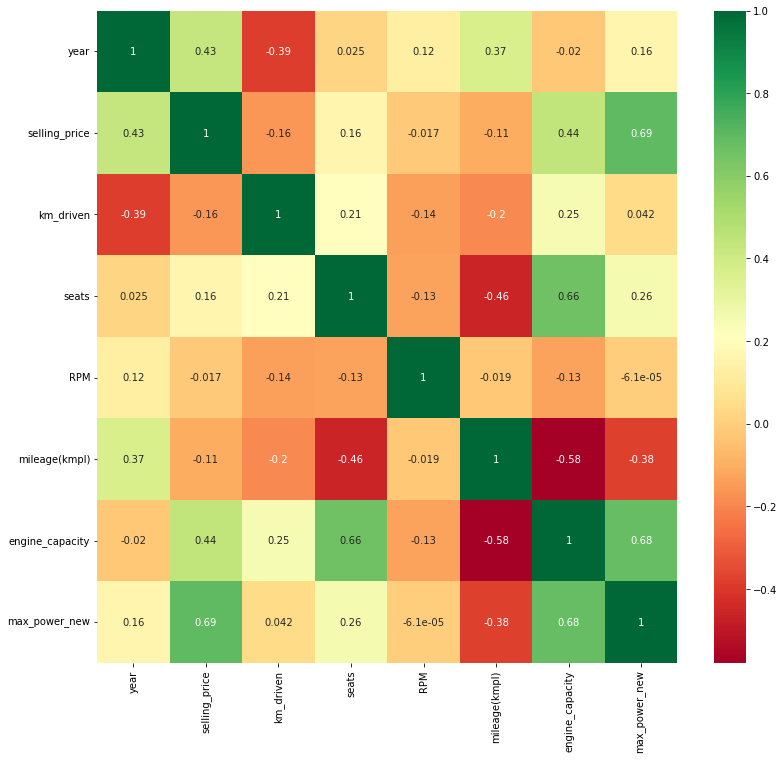

In [344]:
plt.figure(figsize = (13,12))
corr = od_new.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

#### Inference:
->Features has no correlation with eachother and with target variable as well.

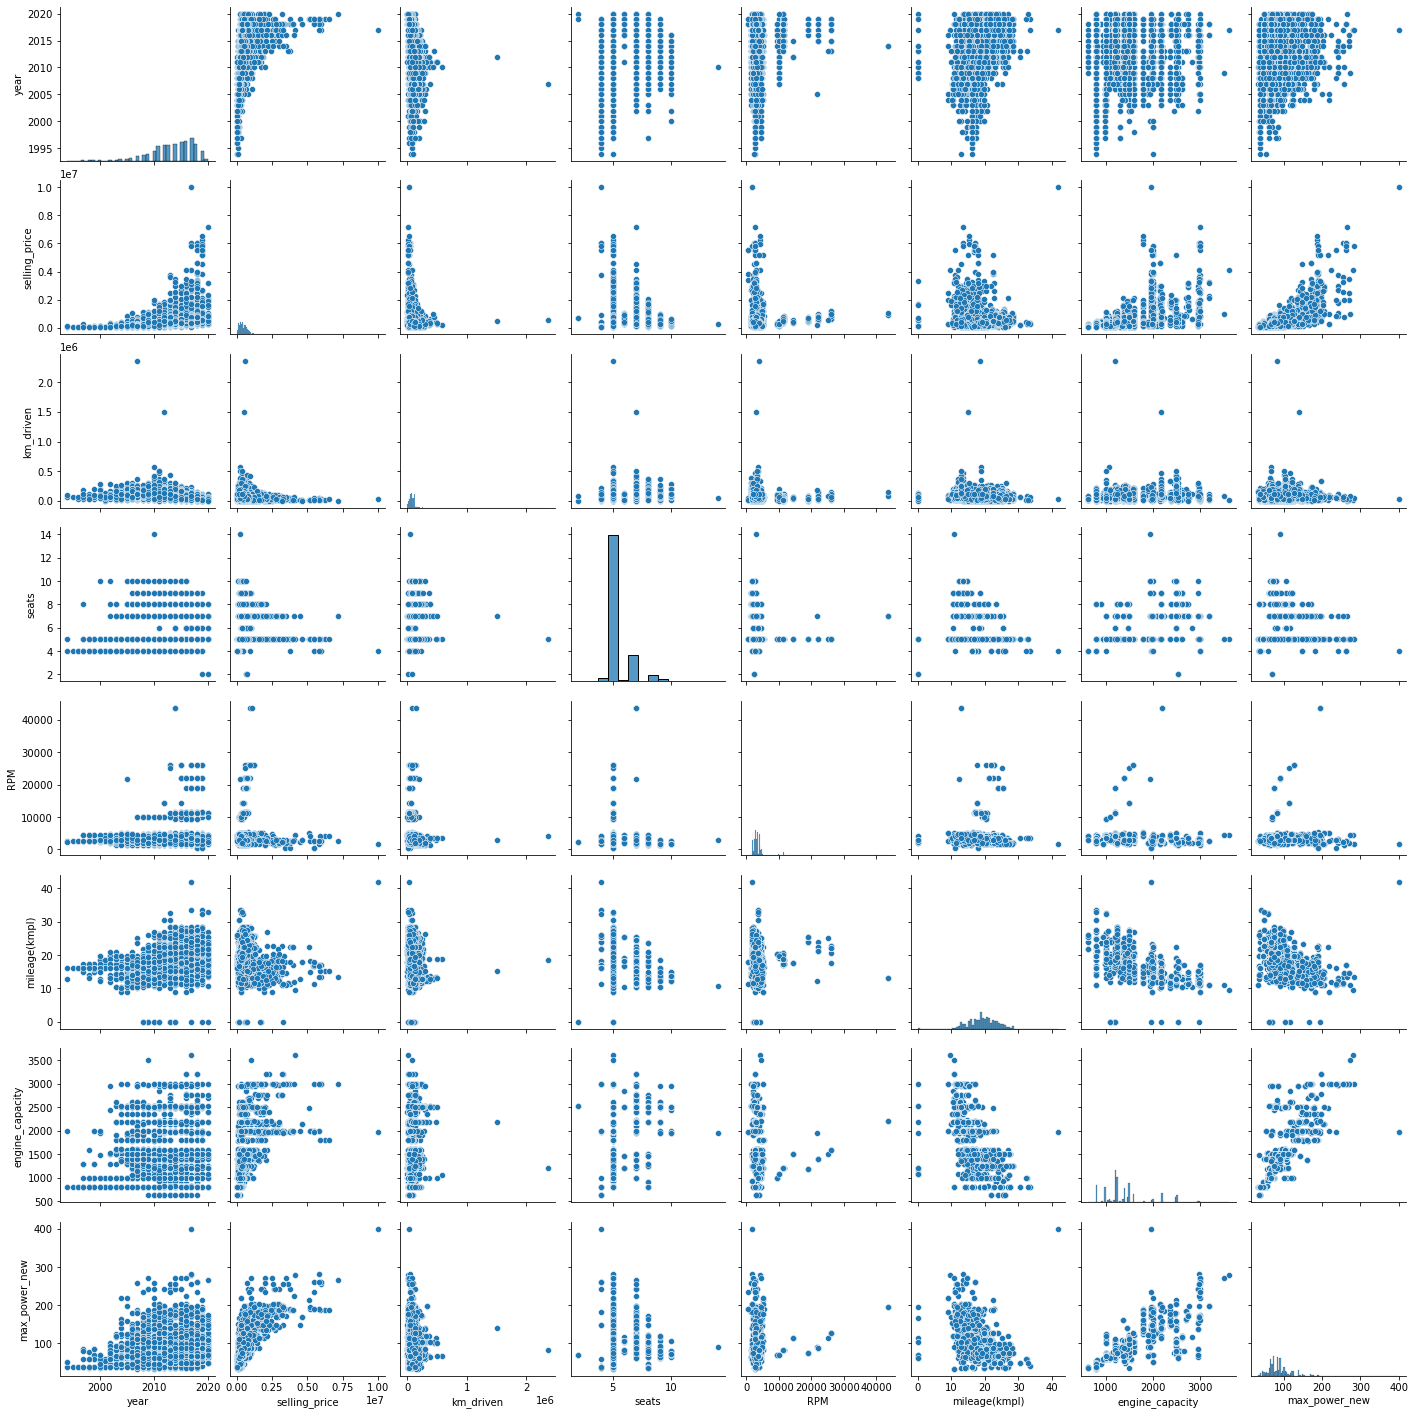

In [345]:
sns.pairplot(data=od_new,vars=od_new[num_cols])
plt.show()

#### Inference:
1. As the year increases the selling price increases as well.
2. selling price and max_power are in a positive relation.

### Feature Engineering

1.Outlier Treatment

In [474]:
cd = od_new.copy()

outlier Detection:
    a.Upper limit = selling_price,km_driven,seats,RPM,mileage(kmpl),engine_capacity,max_power_new.<br>
    b.lower limit = year,seats,RPM,mileage(kmpl),engine_capacity.<br>

In [475]:
cd.describe(percentiles=[0.01,0.02,0.03,0.05,0.1,0.25,0.4,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,40%,50%,75%,95%,96%,97%,98%,99%,max
year,6717.0,2013.611136,3.897402,1994.0,2002.0000,2004.00,2005.00,2007.0,2008.00,2011.0,2013.0,2014.00,2017.0,2019.00,2019.00,2019.00,2.019000e+03,2019.00,2020.0
selling_price,6717.0,526385.997022,523550.448297,29999.0,55000.0000,70000.00,85000.00,110000.0,150000.00,250000.0,350000.0,420000.00,650000.0,1200000.00,1350000.00,1600000.00,1.880640e+06,2792000.00,10000000.0
km_driven,6717.0,73398.337651,58703.275270,1.0,5000.0000,6000.00,9500.00,11500.0,20000.00,38000.0,55000.0,68203.00,100000.0,155000.00,168000.00,181255.32,2.000000e+05,239912.16,2360457.0
seats,6717.0,5.434271,0.983805,2.0,4.0000,5.00,5.00,5.0,5.00,5.0,5.0,5.00,5.0,7.00,8.00,8.00,8.000000e+00,9.00,14.0
RPM,6717.0,3417.426679,2469.332351,400.0,1500.0000,1750.00,1750.00,1750.0,1900.00,2250.0,2750.0,3000.00,4000.0,4800.00,5000.00,9904.00,1.137500e+04,14415.00,43639.0
mileage(kmpl),6717.0,19.466585,4.048102,0.0,11.1832,11.79,12.05,12.8,13.93,16.8,18.6,19.44,22.5,25.83,26.21,26.59,2.739000e+01,28.40,42.0
engine_capacity,6717.0,1430.985857,493.469198,624.0,796.0000,796.00,796.00,796.0,993.00,1197.0,1199.0,1248.00,1498.0,2499.00,2523.00,2523.00,2.609000e+03,2956.00,3604.0
max_power_new,6717.0,87.766100,31.724555,32.8,37.0000,37.48,46.30,47.3,56.30,67.1,74.0,81.83,100.0,147.90,153.86,170.00,1.773128e+02,190.00,400.0


In [476]:
cd["selling_price"] = cd["selling_price"].clip(upper=cd["selling_price"].quantile(0.97))
cd["km_driven"] = cd["km_driven"].clip(upper=cd["km_driven"].quantile(0.94))
cd["RPM"] = cd["RPM"].clip(upper=cd["RPM"].quantile(0.95))
cd["mileage(kmpl)"] = cd["mileage(kmpl)"].clip(upper=cd["mileage(kmpl)"].quantile(0.97))
cd["engine_capacity"] = cd["engine_capacity"].clip(upper=cd["engine_capacity"].quantile(0.96))
cd["max_power_new"] = cd["max_power_new"].clip(upper=cd["max_power_new"].quantile(0.96))

In [477]:
cd["engine_capacity"] = cd["engine_capacity"].clip(lower=cd["engine_capacity"].quantile(0.1))
cd["max_power_new"] = cd["max_power_new"].clip(lower=cd["max_power_new"].quantile(0.1))

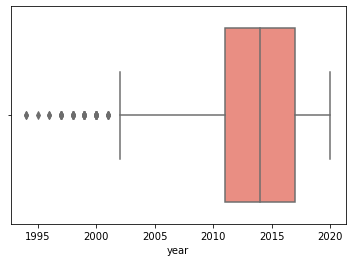

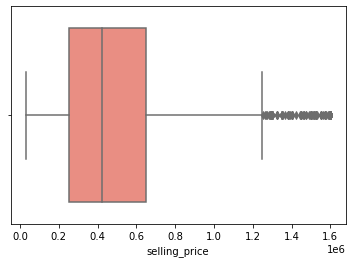

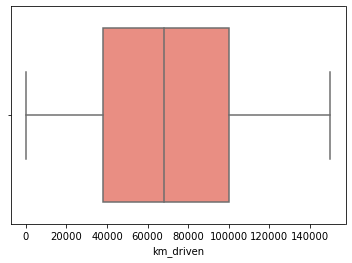

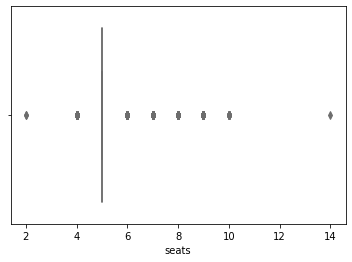

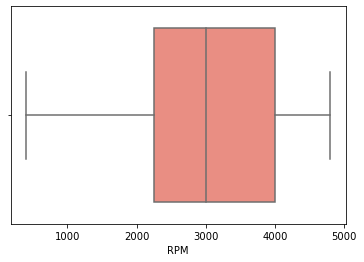

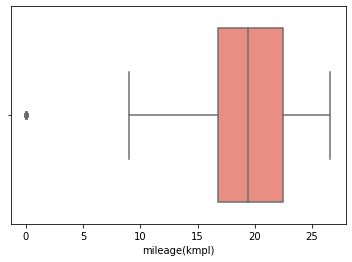

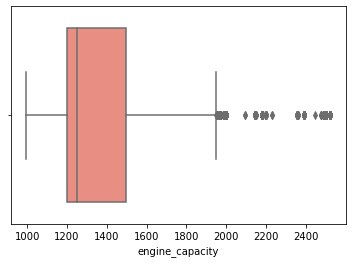

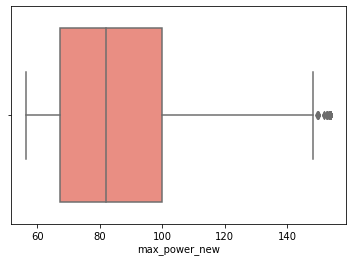

In [478]:
for n in num_cols:
    sns.boxplot(x=cd[n], color = "salmon")
    plt.show()

In [479]:
from sklearn.preprocessing import StandardScaler

In [480]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             6717 non-null   int64  
 1   selling_price    6717 non-null   float64
 2   km_driven        6717 non-null   float64
 3   fuel             6717 non-null   object 
 4   seller_type      6717 non-null   object 
 5   transmission     6717 non-null   object 
 6   owner            6717 non-null   object 
 7   seats            6717 non-null   float64
 8   RPM              6717 non-null   float64
 9   mileage(kmpl)    6717 non-null   float64
 10  engine_capacity  6717 non-null   float64
 11  max_power_new    6717 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 940.2+ KB


2.Categorical Columns Treatment

In [481]:
lpg = cd[ (cd['fuel'] == "LPG")].index
cd.drop(lpg , inplace=True)
cd.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,RPM,mileage(kmpl),engine_capacity,max_power_new
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,5.0,2000.0,23.40,1248.0,74.00
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,5.0,2500.0,21.14,1498.0,103.52
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,5.0,2700.0,17.70,1497.0,78.00
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,5.0,2750.0,23.00,1396.0,90.00
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,5.0,4500.0,16.10,1298.0,88.20
5,2017,440000.0,45000.0,Petrol,Individual,Manual,First Owner,5.0,4800.0,20.14,1197.0,81.86
7,2001,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,4.0,2500.0,16.10,993.0,56.30
8,2011,350000.0,90000.0,Diesel,Individual,Manual,First Owner,5.0,2400.0,23.59,1364.0,67.10
9,2013,200000.0,150000.0,Diesel,Individual,Manual,First Owner,5.0,2000.0,20.00,1399.0,68.10
10,2014,500000.0,68000.0,Diesel,Individual,Manual,Second Owner,5.0,2250.0,19.01,1461.0,108.45


In [496]:
cd["fuel"].value_counts()

1    3658
2    2973
0      51
Name: fuel, dtype: int64

In [482]:
lb=LabelEncoder()
for i in cat_cols:
    cd[i]=lb.fit_transform(cd[i])

In [483]:
cd

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,RPM,mileage(kmpl),engine_capacity,max_power_new
0,2014,450000.0,145500.0,1,1,1,0,5.0,2000.0,23.40,1248.0,74.00
1,2014,370000.0,120000.0,1,1,1,2,5.0,2500.0,21.14,1498.0,103.52
2,2006,158000.0,140000.0,2,1,1,4,5.0,2700.0,17.70,1497.0,78.00
3,2010,225000.0,127000.0,1,1,1,0,5.0,2750.0,23.00,1396.0,90.00
4,2007,130000.0,120000.0,2,1,1,0,5.0,4500.0,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000.0,50000.0,2,1,1,2,5.0,3500.0,18.90,998.0,67.10
8122,2014,475000.0,80000.0,1,1,1,2,5.0,2750.0,22.54,1396.0,88.73
8123,2013,320000.0,110000.0,2,1,1,0,5.0,4000.0,18.50,1197.0,82.85
8124,2007,135000.0,119000.0,1,1,1,1,5.0,2750.0,16.80,1493.0,110.00


### Model Development

In [484]:
#For Model Development
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [485]:
def reg_sum(model,x_train,x_test,y_train,y_test):
    import time
    initial=time.time()
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    train=model.score(x_train,y_train)
    test = model.score(x_test,y_test)
    R2_score=r2_score(y_test,ypred)
    MSE=mean_squared_error(y_test,ypred)
    RMSE=np.sqrt(mean_squared_error(y_test,ypred))
    time=time.time()-initial
    return train,test,R2_score,MSE,RMSE,time

In [486]:
y = cd["selling_price"]
x = cd.drop(columns = ["selling_price"])

In [487]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,
                                               random_state=2,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape) 

(5011, 11)
(1671, 11)
(5011,)


In [488]:
dt = DecisionTreeRegressor()
dt_train,dt_test,dt_r2,dt_MSE,dt_RMSE,dt_time=reg_sum(dt,x_train,x_test,y_train,y_test)

In [489]:
res1 = pd.DataFrame({'Model':'DT',"Train Score":dt_train,"Test Score":dt_test,'R2_Score':dt_r2,'MSE':dt_MSE,'RMSE':dt_RMSE,"Time Taken":dt_time},index=[1])
res1

,Model,Train Score,Test Score,R2_Score,MSE,RMSE,Time Taken
1,DT,0.997279,0.839883,0.839883,1.737336e+10,131808.049746,0.084661


In [490]:
xg = XGBRegressor()
xg_train,xg_test,xg_r2,xg_MSE,xg_RMSE,xg_time=reg_sum(xg,x_train,x_test,y_train,y_test)

In [491]:
res2 = pd.DataFrame({'Model':'XGBoost',"Train Score":xg_train,"Test Score":xg_test,'R2_Score':xg_r2,'MSE':xg_MSE,'RMSE':xg_RMSE,"Time Taken":xg_time},index=[2])
res2

,Model,Train Score,Test Score,R2_Score,MSE,RMSE,Time Taken
2,XGBoost,0.98099,0.903626,0.903626,1.045695e+10,102259.247158,0.723408


In [492]:
ab= AdaBoostRegressor(random_state=31)

In [493]:
dt2 = DecisionTreeRegressor(max_depth=50, min_samples_leaf=30)
ab= AdaBoostRegressor(base_estimator=dt2,n_estimators=100)
ab_train,ab_test,ab_r2,ab_MSE,ab_RMSE,ab_time=reg_sum(ab,x_train,x_test,y_train,y_test)

In [494]:
res3 = pd.DataFrame({'Model':'Ada Boost',"Train Score":ab_train,"Test Score":ab_test,'R2_Score':ab_r2,'MSE':ab_MSE,'RMSE':ab_RMSE,"Time Taken":ab_time},index=[3])
res3

,Model,Train Score,Test Score,R2_Score,MSE,RMSE,Time Taken
3,Ada Boost,0.927278,0.890583,0.890583,1.187217e+10,108959.484829,1.976657


In [495]:
result = pd.concat([res1,res2,res3])
result

,Model,Train Score,Test Score,R2_Score,MSE,RMSE,Time Taken
1,DT,0.997279,0.839883,0.839883,1.737336e+10,131808.049746,0.084661
2,XGBoost,0.980990,0.903626,0.903626,1.045695e+10,102259.247158,0.723408
3,Ada Boost,0.927278,0.890583,0.890583,1.187217e+10,108959.484829,1.976657


The Best Performing Model Is Ada_boost